# 1 Importing libraries and dataframes

## 1.1 Importing libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
plt.style.use('ggplot')

c:\Users\u125435\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.2 importing dataframes

In [2]:
df_customer = pd.read_csv('./data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('./data/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('./data/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('./data/olist_orders_dataset.csv')
df_products = pd.read_csv('./data/olist_products_dataset.csv')
df_seller = pd.read_csv('./data/olist_sellers_dataset.csv')
df_prod_category= pd.read_csv('./data/product_category_name_translation.csv')



## 1.3 High-level analysis of the datasets

In [3]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [7]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
df_order_payment.info()
print(df_order_payment.shape)
print(df_order_payment.isnull().any())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
(103886, 5)
order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool


In [13]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
df_order_reviews.info()
print(df_order_reviews.shape)
print(df_order_reviews.isnull().any())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
(99224, 7)
review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool


In [15]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
df_prod_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<p>This high-level information of the datasets showed the presence of incomplete information. It also raised 3 questions:</p>
<ol>
    <li>What's the average order value?</li>
    <li>What are the best selling product categories?</li>
    <li>Is it possible to create a NLP based classification model able to classify a review into good or bad?</li>
</ol>

<p>The next section will focus on analyzing the datasets needed to answer the previous questions</p> 

## 1.4 A deeper look into the required datasets

<p> in order to answer the previous questions it will be necessary evaluate, clean and merge data from the following datasets:</p>

<ul>
    <li>df_products, df_product_category,df_order, df_order_payments and df_order_items - translate all product categories into English and go through order items to facilitate product category analysis</li>
    <br>
    <li>df_order, df_order_review -  datasets will be used understand customer reviews and create the NLP model for sentiment analysis</li>
</ul>
    <br>
<p> <b>IMPORTANT</b> All dataframes will be checked for missing values and duplicated entries to ensure better data quality </p>


### 1.4.1 Products

In [20]:
df_products.shape

(32951, 9)

In [21]:
df_products.isnull().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [22]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
df_products=df_products.dropna()

In [24]:
duplicated_products=df_products[df_products['product_id'].duplicated()]

duplicated_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [25]:
df_products.isnull().any()

product_id                    False
product_category_name         False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g              False
product_length_cm             False
product_height_cm             False
product_width_cm              False
dtype: bool

<p> no duplicated entries nor missing values were found</p>

In [26]:
df_prod_category.isnull().any()

product_category_name            False
product_category_name_english    False
dtype: bool

In [27]:
duplicated_categories=df_prod_category[df_prod_category['product_category_name'].duplicated()]

duplicated_categories

,product_category_name,product_category_name_english


<p> no duplicated categories nor missing values were found</p>

In [28]:
df_products_merged = df_products.merge(df_prod_category, on='product_category_name', how='inner')
df_products_merged.isnull().any()

product_id                       False
product_category_name            False
product_name_lenght              False
product_description_lenght       False
product_photos_qty               False
product_weight_g                 False
product_length_cm                False
product_height_cm                False
product_width_cm                 False
product_category_name_english    False
dtype: bool

In [29]:
df_products_final = df_products_merged[['product_id','product_category_name_english']]
df_products_final.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


In [30]:
df_products_final.isnull().any()

product_id                       False
product_category_name_english    False
dtype: bool

### 1.4.2 Orders

In [31]:
print(df_orders.columns)
print(df_order_items.columns)
print(df_order_payment.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


<h3>Analyzing df_orders</h3>

In [32]:
status_count = df_orders['order_status'].value_counts()

status_count

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

<p> For the revenue calculation it will only be considered the following status: invoice, shipped and delivered </p>

In [33]:
df_order_final=df_orders[df_orders['order_status'].isin(['delivered','invoiced','shipped'])]
df_order_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [34]:
df_order_final.isnull().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [35]:
duplicated_order=df_order_final[df_order_final['order_id'].duplicated()]
duplicated_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


<p> The scope of the question doesn't take into account the fields "order_approved_at", "order_delivered_carrier_date" and "order_delivered_customer_date", so these columns can be removed without affecting on relevant data quality for the analysis</p>

In [36]:
df_order_final=df_order_final.drop(["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"],axis=1)
df_order_final

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15 00:00:00


<p> no duplicated entries nor missing values were found</p>

<h3>Analyzing df_order_items</h3>

In [37]:
df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [38]:
duplicated_order_items=df_order_items[df_order_items['order_id'].duplicated()]

duplicated_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


<p>It's expected to have multiple records of the same order id because an order may have more than 1 product. The next step is to add product category in this dataset</p>

In [39]:
df_order_items = df_order_items.merge(df_products_merged,on='product_id', how='inner')
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111017,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools
111018,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,furniture_decor
111019,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0,watches_gifts
111020,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,sports_leisure


In [40]:
df_order_items=df_order_items[['order_id','order_item_id','product_id','price','freight_value','product_category_name_english']]
df_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


In [41]:
df_order_items.isnull().any()

order_id                         False
order_item_id                    False
product_id                       False
price                            False
freight_value                    False
product_category_name_english    False
dtype: bool

<h3>Analyzing df_order_payment</h3>

In [42]:
df_order_payment.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [43]:
df_order_payment.isnull().any()

order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

In [44]:
print(df_order_reviews.columns)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


<h3>Analyzing df_order_review</h3>

<p> While the previous datasets are related to questions 1 and 2, the order_review dataset is the main datasource for the NLP model. In this scenario an empty review title doesn't impact the sentiment analysis model. However, the lack of the comment does. The empty review titles will be replaced by "Title not available", and the records


</p>

In [45]:
df_order_reviews.isnull().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

In [46]:
df_order_reviews['review_comment_title']=df_order_reviews['review_comment_title'].fillna("Title not available")

In [47]:
df_order_reviews.isnull().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title       False
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

In [48]:
df_order_reviews_final=df_order_reviews.dropna()

In [49]:
df_order_reviews_final.isnull().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title       False
review_comment_message     False
review_creation_date       False
review_answer_timestamp    False
dtype: bool

<p>As of now all datasets that are going to be used are clean, therefore it's possible to proceed with the EDA and answer questions 1 and 2</p> 

# 2 Exploratory Data Analysis

## 2.1 Whats's the Average Order Value (AOV)?

<p> This section is dedicated to explore evaluate and understand better the e-commerce customers and order, starting by payment methods and average order value </p>

In [50]:
df_order_final.shape

(97899, 5)

In [51]:
df_order_final.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [52]:
df_order_payment.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [53]:
df_order_final =df_order_final.merge(df_order_payment,on='order_id',how='inner')
df_order_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,1,credit_card,3,179.12


<p> Current datasets show purchase value in reais (BRL), Brazilian, it will be converted to USD to facilitate analysis and results comprehension </p>

In [54]:
df_order_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102247 entries, 0 to 102246
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102247 non-null  object 
 1   customer_id                    102247 non-null  object 
 2   order_status                   102247 non-null  object 
 3   order_purchase_timestamp       102247 non-null  object 
 4   order_estimated_delivery_date  102247 non-null  object 
 5   payment_sequential             102247 non-null  int64  
 6   payment_type                   102247 non-null  object 
 7   payment_installments           102247 non-null  int64  
 8   payment_value                  102247 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.8+ MB


In [55]:
df_order_final['order_purchase_timestamp'] = pd.to_datetime(df_order_final['order_purchase_timestamp'])

In [56]:
df_order_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102247 entries, 0 to 102246
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102247 non-null  object        
 1   customer_id                    102247 non-null  object        
 2   order_status                   102247 non-null  object        
 3   order_purchase_timestamp       102247 non-null  datetime64[ns]
 4   order_estimated_delivery_date  102247 non-null  object        
 5   payment_sequential             102247 non-null  int64         
 6   payment_type                   102247 non-null  object        
 7   payment_installments           102247 non-null  int64         
 8   payment_value                  102247 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.8+ MB


In [57]:
df_order_final['order_purchase_timestamp'].describe()

C:\Users\u125435\AppData\Local\Temp\ipykernel_22524\4101788310.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_order_final['order_purchase_timestamp'].describe()


count                  102247
unique                  97351
top       2017-04-20 12:45:34
freq                       29
first     2016-09-04 21:15:19
last      2018-09-03 09:06:57
Name: order_purchase_timestamp, dtype: object

<p> By getting to know the purchases dates it's possible to get an exchange rate, for this case it was taken the average of the exchange rate for the last day of each month, based on Bazilian Central Bank. the value is 1USD = 3.368 BRL</p> 

In [58]:
exchange_rate = 3.368

In [59]:
df_order_final['payment_value']=df_order_final['payment_value']/exchange_rate

In [60]:
print(df_order_final['payment_type'].unique())

['credit_card' 'voucher' 'boleto' 'debit_card']


In [61]:
df_order_final['payment_type']=df_order_final['payment_type'].replace('boleto', 'bank slip')

In [62]:
df_order_final.sort_values(by=['order_id'],ascending=False)
df_order_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,1,credit_card,1,5.380048
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,3,voucher,1,0.593824
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2,voucher,1,5.519596
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,1,bank slip,1,42.001188
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,1,credit_card,3,53.182898


In [63]:
df_order_purchase_total = df_order_final[['order_id','payment_value']].groupby('order_id',as_index=False).sum()
df_order_purchase_total.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,21.434086
1,00018f77f2f0320c557190d7a144bdd3,77.146675
2,000229ec398224ef6ca0657da4fc703e,64.391330
3,00024acbcdf0a6daa1e931b038114c75,7.654394
4,00042b26cf59d7ce69dfabb4e55b4fd9,64.738717


In [64]:
df_order_purchase_total.describe()

,payment_value
count,97898.000000
mean,47.521508
std,64.987448
min,2.847387
25%,18.396675
50%,31.258907
75%,52.416122
max,4057.030879


Order mean value USD 47.52
Median order value USD 31.26


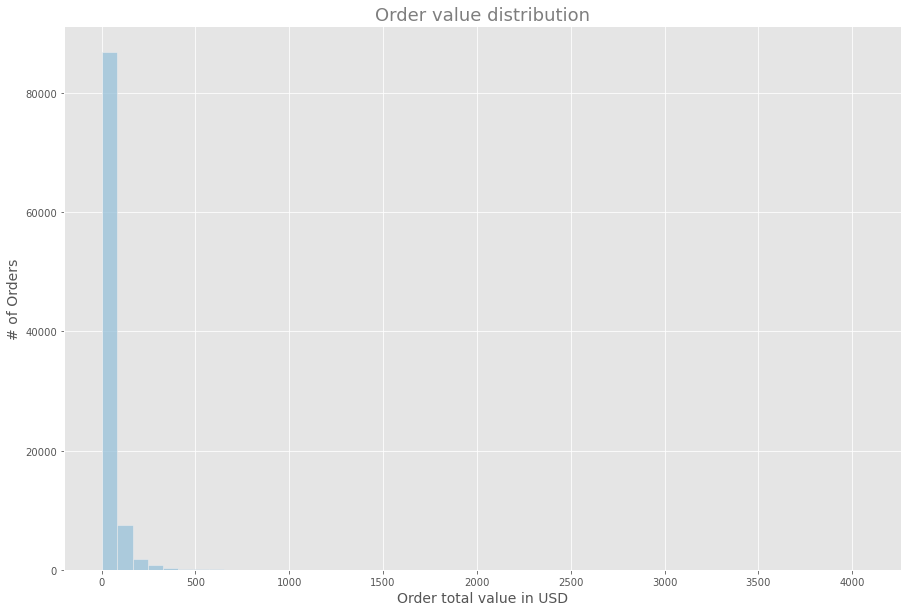

In [65]:
plt.figure(figsize=(15,10))
plt.title('Order value distribution', size=18, color='#7e7e7e')
plt.xlabel('Order total value in USD',size=14)
plt.ylabel('# of Orders',size=14)
sns.histplot(df_order_purchase_total['payment_value'], bins=50, color='#98c1d9')
mean_aov = round(df_order_purchase_total['payment_value'].mean(),2)
median_aov = round(df_order_purchase_total['payment_value'].median(),2)
print(f'Order mean value USD {mean_aov}')
print(f'Median order value USD {median_aov}')

<p> Even though it may seem low value for the average order value, it mus be taken in consideration that the average salary in Brazil for the analyzed period was 623 USD to have a base of compairson</p>

## 2.2 Best selling product categories

<p>This second question is going to be answered by revenue and by items sold per product category</p>

 ### 2.2.1 What are the best selling product categories by revenue?

In [66]:
df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'product_category_name_english'],
      dtype='object')

In [67]:
df_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


In [68]:
df_order_items['total_product_value_usd']= df_order_items['price']/exchange_rate + df_order_items['freight_value']/exchange_rate

C:\Users\u125435\AppData\Local\Temp\ipykernel_22524\2937575838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_items['total_product_value_usd']= df_order_items['price']/exchange_rate + df_order_items['freight_value']/exchange_rate


In [69]:
df_category_revenue = df_order_items[['product_category_name_english','total_product_value_usd']].groupby('product_category_name_english',as_index=False).sum()
df_category_revenue.head()


,product_category_name_english,total_product_value_usd
0,agro_industry_and_commerce,23270.210808
1,air_conditioning,18341.505344
2,art,8387.116983
3,arts_and_craftmanship,648.497625
4,audio,16745.528504


No handles with labels found to put in legend.


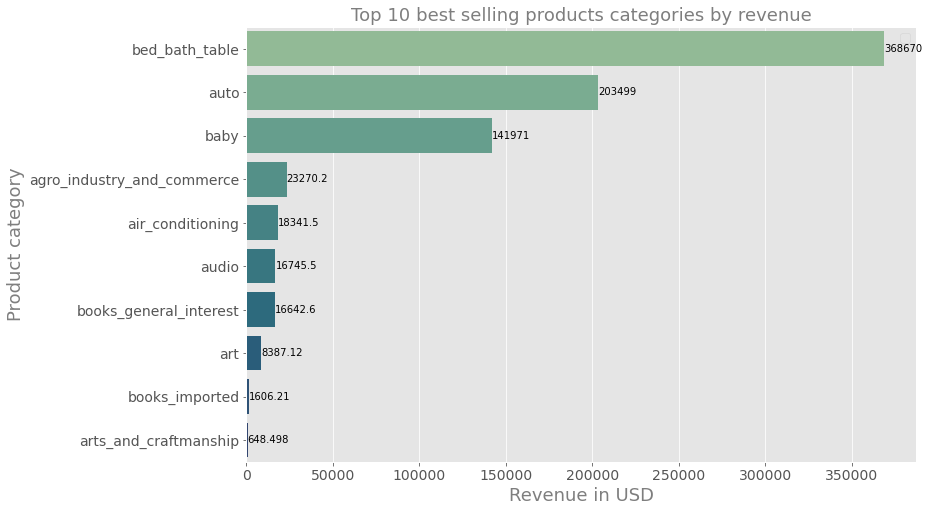

In [70]:

top_10_revenue=df_category_revenue[:10].sort_values(by='total_product_value_usd',ascending=False)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=top_10_revenue,y='product_category_name_english',x='total_product_value_usd',palette='crest',order=top_10_revenue.sort_values('total_product_value_usd',ascending=False).product_category_name_english)
ax.bar_label(ax.containers[0],fontsize=10)
plt.title('Top 10 best selling products categories by revenue',fontsize=18,color='#7e7e7e')
plt.ylabel('Product category',fontsize=18,color='#7e7e7e')
plt.xlabel('Revenue in USD',fontsize=18,color='#7e7e7e')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=12)


 ### 2.2.2 What are the best selling product categories by sold unit?

In [71]:
df_category_sold_item = df_order_items[['product_category_name_english','product_id']].groupby('product_category_name_english',as_index=False).count()
df_category_sold_item.head()

,product_category_name_english,product_id
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364


No handles with labels found to put in legend.


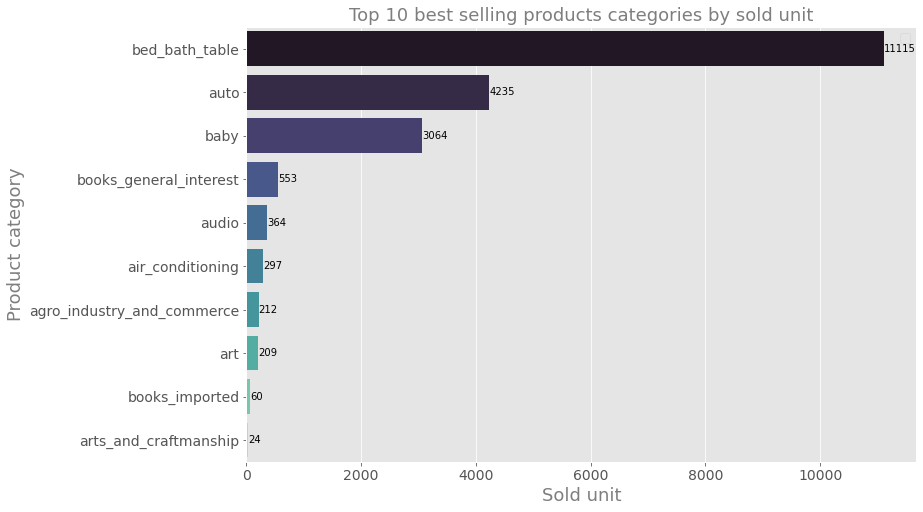

In [104]:
top_10_sold=df_category_sold_item[:10].sort_values(by='product_id',ascending=False)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=top_10_sold,y='product_category_name_english',x='product_id',palette='mako',order=top_10_sold.sort_values('product_id',ascending=False).product_category_name_english)
plt.title('Top 10 best selling products categories by sold unit',fontsize=18,color='#7e7e7e')
ax.bar_label(ax.containers[0],fontsize=10)
plt.ylabel('Product category',fontsize=18,color='#7e7e7e')
plt.xlabel('Sold unit',fontsize=18,color='#7e7e7e')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=12)

In [73]:
for element in top_10_revenue['product_category_name_english'].tolist():
    if element in top_10_sold['product_category_name_english'].tolist():
        print(f'{element} is among top_10 sold by unit')
    else:
        print(f'{element} is  not among top_10 sold by unit')


bed_bath_table is among top_10 sold by unit
auto is among top_10 sold by unit
baby is among top_10 sold by unit
agro_industry_and_commerce is among top_10 sold by unit
air_conditioning is among top_10 sold by unit
audio is among top_10 sold by unit
books_general_interest is among top_10 sold by unit
art is among top_10 sold by unit
books_imported is among top_10 sold by unit
arts_and_craftmanship is among top_10 sold by unit


## 2.3 EDA Conclusion

<p> This first set of data allowed a better understanding of customer behaviour, specially in key performance indicators for e-commerce such as average order value which was $47, the top-10 product category analysis indicated that best selling categories are the same when ranking the list by revenue or amount of sold units. However, the ranking order is different in each list</p> 

# 3. Sentiment Analysis

<p> Before advancing into the NLP model, it's important to find a way to classify if the customer was satisfied with the purchase or not. For this case it will be used the customer rating</p>

## 3.1 Customer rating analysis

In [74]:
df_order_reviews_final.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

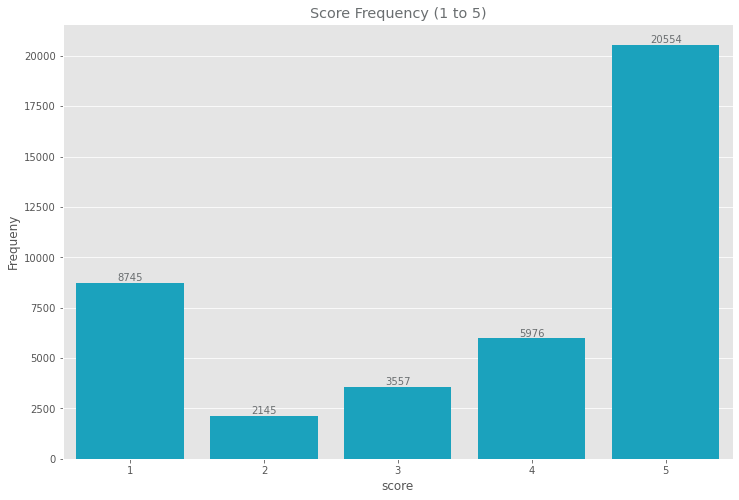

In [75]:
score = df_order_reviews_final[['review_score','order_id']].groupby('review_score',as_index=False).count()
score.head()
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=score, x='review_score', y='order_id', color='#00b4d8')
plt.title('Score Frequency (1 to 5)', color='#6a6e70')
plt.ylabel('Frequeny')
plt.xlabel('score')
ax.bar_label(ax.containers[0],fontsize=10, color='#6a6e70')
plt.show()


In [76]:
print(df_order_reviews_final['review_score'].mean())

3.66986358200942


<p> With an average of 3.67 all ratings below this will be classified as negative rating and above it positive rating</p>

## 3.2 Customer review analysis

### 3.2.1 Analysing for review length

<p> This step aims to take a look into into the size of the reviews that wll be used to build the corpus </p>

In [77]:
df_order_reviews_final['review_comment_message'].str.len().describe()

count    40977.000000
mean        68.637675
std         53.849207
min          1.000000
25%         28.000000
50%         53.000000
75%         95.000000
max        208.000000
Name: review_comment_message, dtype: float64

<p> In Portuguese the shortest word to express opinion has 3 letters, therefore anything lower than that will be removed</p>

In [78]:
df_order_reviews_final = df_order_reviews_final[df_order_reviews_final['review_comment_message'].str.len()>=3]

In [79]:
df_order_reviews_final['review_comment_message'].str.len().describe()

count    40675.000000
mean        69.134972
std         53.737409
min          3.000000
25%         29.000000
50%         53.000000
75%         95.000000
max        208.000000
Name: review_comment_message, dtype: float64

### 3.2.2 Keywords standardization

<p>This step aims to standardize words commonly used to express satisfaction with a product/service, correcting the spelling of . The dictionary below was built based on the visualization of unique values ​​for reviews up to 10 characters</p>

In [80]:
list_review = []
for num_caract in range(4,11):
    
    shortlist_value = df_order_reviews_final['review_comment_message'][df_order_reviews_final['review_comment_message'].str.len() == num_caract].unique().tolist()
    counter = len(shortlist_value)
    for indice in range(0, counter):
        list_review.append(shortlist_value[indice])
list_review[:10]

['foda',
 'Bom!',
 'ruin',
 'Joia',
 'nnnn',
 'Show',
 'Boa ',
 'show',
 '\r\n\r\n',
 'amei']

<p>After analyzing the whole list a dictionary was created to correct misspelled word</p>

In [81]:
correction_dict={
'bim': 'bom',
'blz': 'beleza',
'boua': 'boa',
'joia': 'jóia',
'otmo': 'ótimo',
'otmos': 'ótimos',
'otma': 'ótima',
'otmas': 'ótimas',
'medio': 'médio',
'otimo': 'ótimo',
'otimos': 'ótimos',
'otima': 'ótima',
'otimas': 'ótimas',
'òtimo': 'ótimo',
'òtimos': 'ótimos',
'òtima': 'ótima',
'òtimas': 'ótimas',
'otuno': 'ótimo',
'optimo': 'ótimo',
'optima': 'ótima',
'ótimooo': 'ótimo',
'otimooo': 'ótimo',
'ameiii': 'amei',
'ameiiiii': 'amei',
'ameiiiiii': 'amei',
'mt bom': 'muito bom',
'mto bom': 'muito bom',
'mt boa': 'muito boa',
'mto boa': 'muito boa',
'amoooo': 'amo',
'rapido': 'rápido',
'rapida': 'rápida',
'possimo': 'péssimo',
'possimos': 'péssimos',
'pessimo': 'péssimo',
'pessimos': 'péssimos',
'possima': 'péssima',
'pessima': 'péssima',
'possimas': 'péssimas',
'pessimas': 'péssimas',
'bommmmm': 'bom',
'adorooo': 'adoro',
'bom tmb': 'bom também',
'nora 10': 'nota 10',
'positia': 'positiva',
'positias': 'positivas',
'positio': 'positivo',
'positios': 'positivos',
'rasoave': 'razoável',
'adoreiii': 'adorei',
'adoreiii8': 'adorei',
'adoreiiii': 'adorei',
'confiavel': 'confiável',
'ecelente': 'excelente',
'escelente': 'excelente',
'esselente': 'excelente',
'esxelente': 'excelente',
'excelente': 'excelente',
'execelente': 'excelente',
'execente': 'excelente',
'exelente': 'excelente',
'exerlente': 'excelente',
'ezcrlente': 'excelente',
'gosteiii':'gostei',
'hoviveis': 'horríveis',
'marailhoso':'maravilhoso',
'mito bom': 'muito bom',
'moutobon': 'muito bom',
'mt lindo': 'muito lindo',
'mto lindo': 'muito lindo',
'muinto': 'muito',
'mujito': 'muito',
'muit': 'muito',
'muitio': 'muitos',
'muito boom': 'muito bom',
'muitobom': 'muito bom',
'n gostei': 'não gostei',
'nao': 'não',
'om': 'bom',
'opiniao': 'opinião',
'opniao': 'opinião',
'parabens': 'parabéns',
'pertfeito': 'perfeito',
'prefeito': 'perfeito',
'recomento' :'recomendo',
'reocmendo' :'recomendo',
'reocomendo' :'recomendo',
'revom endo' :'recomendo',
'revomendo' :'recomendo',
'rui': 'ruim',
'satisfacao':'satisfação',
'td': 'tudo',
'bbom': 'bom'
}

In [82]:
df_order_reviews_final['review_comment_message'] = df_order_reviews_final['review_comment_message'].replace(correction_dict, regex = True)

## 3.3 Sentiment analysis

In [83]:
labels = []

for score in df_order_reviews_final['review_score']:

    if score >3:
        labels.append(1)
    else:
        labels.append(0)
    
df_order_reviews_final['label'] = labels
df_order_reviews_final.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,label
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Title not available,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Title not available,Parabéns lojas lannister adorei cbomprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1


c:\Users\u125435\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


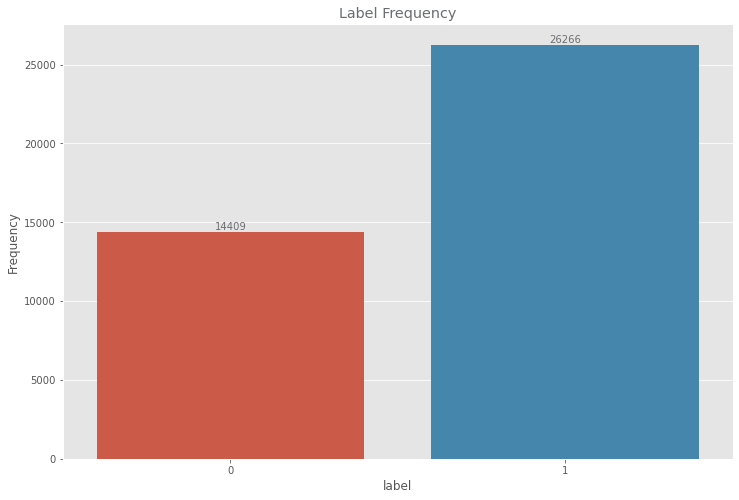

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df_order_reviews_final['label'])
plt.title('Label Frequency', color='#6a6e70')
plt.ylabel('Frequency')
plt.xlabel('label')
ax.bar_label(ax.containers[0],fontsize=10, color='#6a6e70')
plt.show()


In [85]:
import re
from unidecode import unidecode
import spacy
import nltk
import spacy.cli
spacy.cli.download("pt_core_news_md")
import pt_core_news_sm

spc_pt = pt_core_news_sm.load()

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')


In [86]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_pt = stopwords.words('portuguese')

stopwords_pt[:5]
stopwords_pt.remove('não')
stopwords_pt.remove('nem')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u125435\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
def lower_text(text):
    text = text.lower()
    text = re.sub(r"[\W\d_]+", " ", text)

    text = [wrd for wrd in text.split() if wrd not in stopwords_pt]

    spc_text = spc_pt(" ".join(text))
    tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_text]
    
    return " ".join(tokens)

In [88]:
df_order_reviews_final['review_comment_message']=df_order_reviews_final['review_comment_message'].apply(lower_text)

In [89]:
df_order_reviews_final.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,label
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Title not available,recebir bem antes prazo estipular,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Title not available,parabéns loja lannister adorar cbomprar Intern...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente site marca aparelho impress...,2018-05-22 00:00:00,2018-05-23 16:45:47,1
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,Title not available,pouco travar valor ta boa,2018-02-16 00:00:00,2018-02-20 10:52:22,1
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,vendedor confiável produto ok entregar antes p...,2018-05-23 00:00:00,2018-05-24 03:00:01,1


### 3.3.1 Feature extraction

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#### 3.3.1.1 Bag  of words

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bow_vectorizer = CountVectorizer(binary=True, max_features=5000)
bow_features = bow_vectorizer.fit_transform(df_order_reviews_final['review_comment_message'])

#### 3.3.1.2 Naive Bayes

In [92]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_features, df_order_reviews_final['label'], test_size=0.3, random_state=10)
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train_bow)


MultinomialNB()

In [93]:
y1_pred = nb_bow.predict(X_test_bow)

print(classification_report(y_test_bow, y1_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4270
           1       0.92      0.91      0.91      7933

    accuracy                           0.89     12203
   macro avg       0.88      0.88      0.88     12203
weighted avg       0.89      0.89      0.89     12203



#### 3.3.1.3 Decision Tree

In [94]:
decision_tree_bow = DecisionTreeClassifier()
decision_tree_bow .fit(X_train_bow, y_train_bow)


DecisionTreeClassifier()

In [95]:
y2_pred = decision_tree_bow.predict(X_test_bow)

print(classification_report(y_test_bow, y2_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4270
           1       0.88      0.88      0.88      7933

    accuracy                           0.85     12203
   macro avg       0.83      0.83      0.83     12203
weighted avg       0.85      0.85      0.85     12203



#### 3.3.1.4 TF-IDF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df_order_reviews_final['review_comment_message'])


#### 3.3.1.5 Naive Bayes

In [98]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_features, labels, test_size=0.3, random_state=10)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB()

In [99]:
y3_pred = nb_tfidf.predict(X_test_tfidf)

print(classification_report(y_test_tfidf, y3_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4270
           1       0.91      0.92      0.91      7933

    accuracy                           0.89     12203
   macro avg       0.88      0.87      0.87     12203
weighted avg       0.89      0.89      0.89     12203



#### 3.3.1.6 Decision Tree

In [100]:
decision_tree_tfidf = DecisionTreeClassifier()
decision_tree_tfidf.fit(X_train_tfidf , y_train_tfidf)

DecisionTreeClassifier()

In [101]:
y4_pred = decision_tree_tfidf.predict(X_test_tfidf)

print(classification_report(y_test_tfidf, y4_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      4270
           1       0.88      0.89      0.89      7933

    accuracy                           0.85     12203
   macro avg       0.84      0.83      0.83     12203
weighted avg       0.85      0.85      0.85     12203



In [102]:
print(classification_report(y_test_bow, y1_pred))
print(classification_report(y_test_tfidf, y3_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4270
           1       0.92      0.91      0.91      7933

    accuracy                           0.89     12203
   macro avg       0.88      0.88      0.88     12203
weighted avg       0.89      0.89      0.89     12203

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4270
           1       0.91      0.92      0.91      7933

    accuracy                           0.89     12203
   macro avg       0.88      0.87      0.87     12203
weighted avg       0.89      0.89      0.89     12203



### 3.3.2 Conclusion regarding the evaluated models

<p> On the whole Naive Bayes had a better accurancy than Decision Tree. Both bag of words and TFIDF showed similar results, however according to Akuma (2022) TFIDF is recommendend when count of occurence  of words is of paramount importance as it happens when reading reviews</p>

#### 3.3.3 Naive Bayes with new data

In [103]:
def sentiment(texto):

  vector_text = tfidf_vectorizer.transform([texto])
  pred = nb_tfidf.predict(vector_text)

  if pred == 0:
    print("This is a negative review.")
  else:
    print("This is a positive review.")
    
new_reviews = ['Demorou demais não gostei','Produto recebido é horrível', 'Gostei muito', 'bom demais']
#new_reviews = ['Delivery took too long didn't like it', 'Product is terrible', 'I really liked it', 'very good']

for rev in new_reviews:

    sentiment(rev)

This is a positive review.
This is a negative review.
This is a positive review.
This is a positive review.
